# Predicting heart disease using machine learning
This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a ML model capable of predicting whether a person has heart disease or not based on their medical attributes.

Approach:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition
> To predict whether a person is having a heart disease or not based on the clinical parameters of the patient.

## 2. Data
> The original data came from Cleavland data from the UCI ML Repository - https://archive.ics.uci.edu/ml/datasets/heart+disease

## 3. Evaluation
> If the machine learning model reaches an accuracy around 95% at predicting whether or not a patient has heart disease, it will be very effective.

## 4. Features
>### Heart Disease Data Dictionary

>1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools
* `pandas` for data analysis.
* `NumPy` for numerical operations.
* `Matplotlib`/`seaborn` for plotting or data visualization.
* `Scikit-Learn` for machine learning modelling and evaluation.

In [94]:
# Regular EDA (Exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear in the notebook
%matplotlib inline

# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score

## Load the data

In [2]:
df = pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.shape

(303, 14)

## Data Exploration
Since EDA has no real set methodolgy, the following is a short check list you might want to walk through:

1. What question(s) are you trying to solve (or prove wrong)?
2. What kind of data do you have and how do you treat different types?
3. What’s missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [4]:
# Let's find out how many classes are present
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

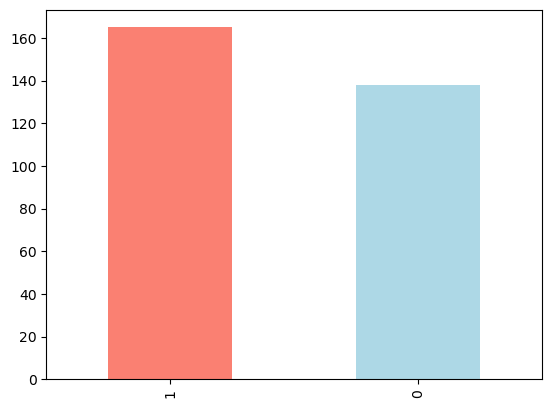

In [5]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

Since these two values are close to even, our target column can be considered **balanced**. An **unbalanced** target column, meaning some classes have far more samples, can be harder to model than a balanced set. Ideally, all of your target classes have the same number of samples.

In [6]:
# Normalized value counts - fraction of each class
df["target"].value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

In [7]:
df.info()
# df.info() shows a quick insight to the number of missing values you have and what type of data your working with.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Check if any missing values/NaN are present
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease frequency according to sex

In [10]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
# Compare target column with sex column
pd.crosstab(df["target"], df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


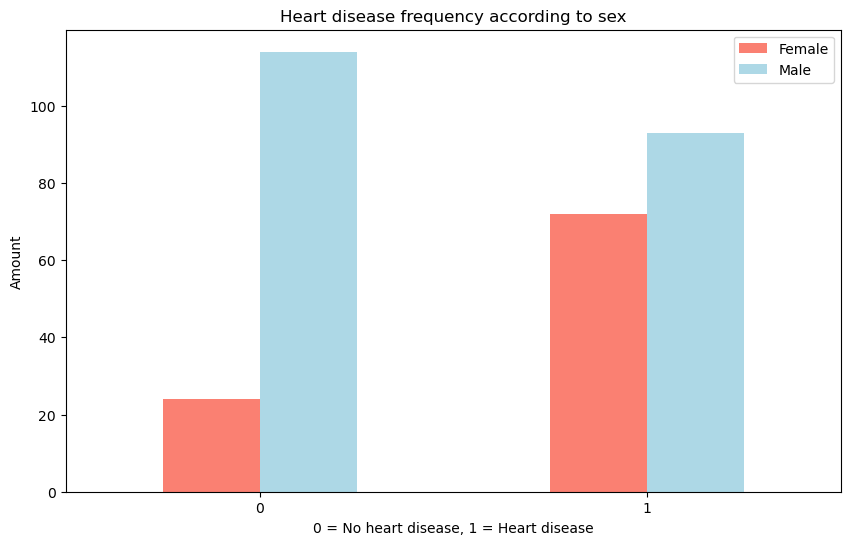

In [12]:
# Create a plot 
pd.crosstab(df.target, df.sex).plot.bar(figsize=(10,6), color=["salmon", "lightblue"]);
plt.title("Heart disease frequency according to sex");
plt.xlabel("0 = No heart disease, 1 = Heart disease");
plt.ylabel("Amount");
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);          # keeps the labels on the x-axis vertical

### Age Vs Max Heart Rate for Heart Disease

In [13]:
df["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

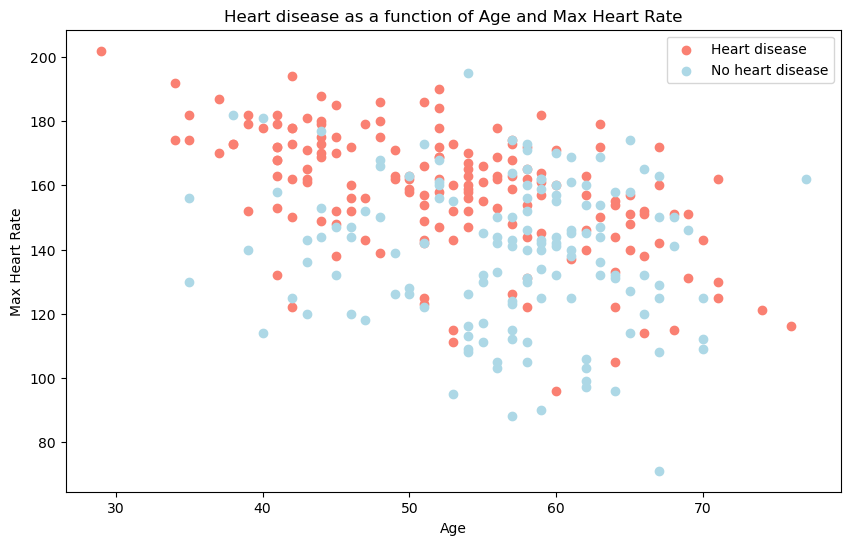

In [14]:
# Compare by creating a plot
plt.figure(figsize=(10,6));

# Scatter plot with positive examples - for those having heart disease
plt.scatter(df.age[df["target"]==1], df.thalach[df["target"]==1], c="salmon");

# Scatter plot with negative examples - for those not having heart disease
plt.scatter(df.age[df["target"]==0], df.thalach[df["target"]==0], c="lightblue");

plt.title("Heart disease as a function of Age and Max Heart Rate");
plt.xlabel("Age");
plt.ylabel("Max Heart Rate");
plt.legend(["Heart disease", "No heart disease"]);

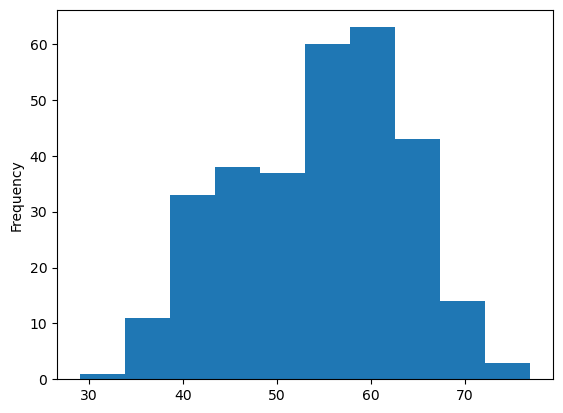

In [15]:
# Check the distribution of the age column with histogram
df["age"].plot.hist();

We can see it's a **normal distribution** but slightly swaying to the right, which reflects in the scatter plot above.

### Heart Disease Frequency per Chest Pain Type
* cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [16]:
pd.crosstab(df["cp"], df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


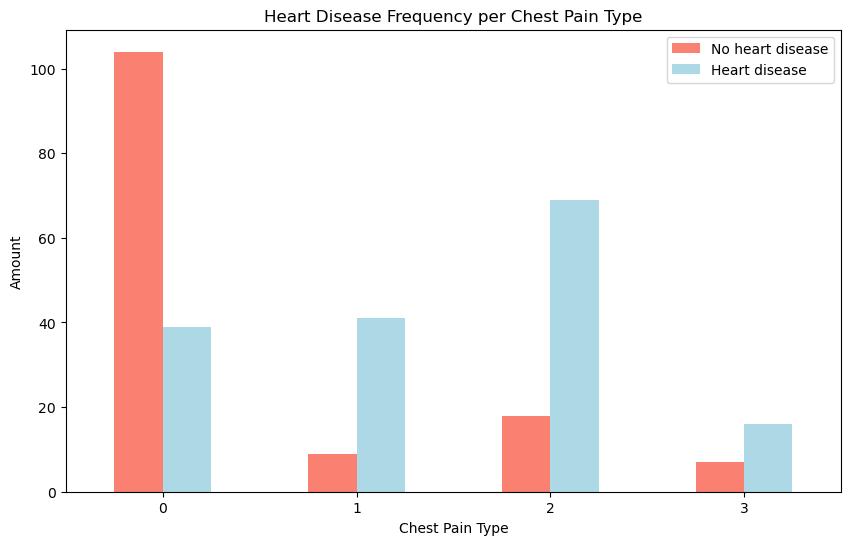

In [17]:
# Create a plot
pd.crosstab(df["cp"], df["target"]).plot(kind="bar",
                                         figsize=(10,6),
                                         color=["salmon", "lightblue"]);

plt.title("Heart Disease Frequency per Chest Pain Type");
plt.xlabel("Chest Pain Type");
plt.ylabel("Amount");        # Amount of people
plt.legend(["No heart disease", "Heart disease"]);
plt.xticks(rotation=0);

### Correlation between independent variables

In [18]:
# Make a correlation matrix - Tells that how variables are related to each other.
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


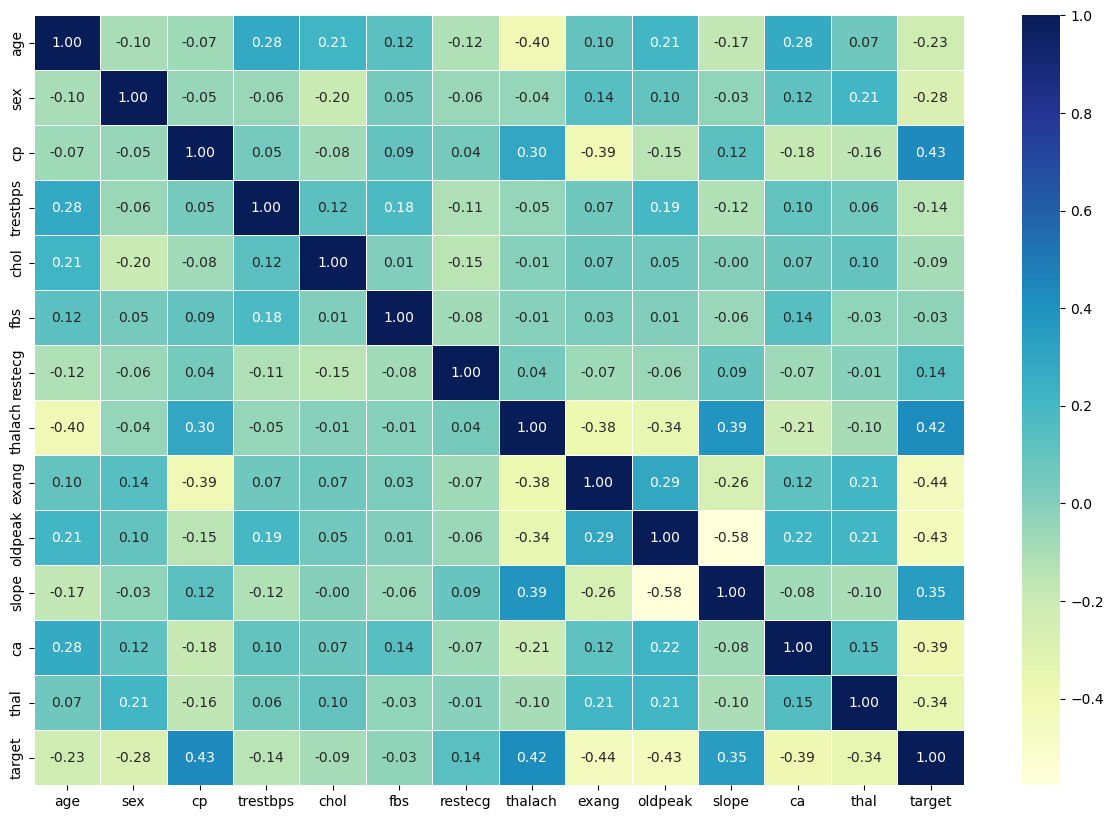

In [19]:
# Better visual representation of correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
# positive value represents positive correlation
# correlation between cp and target is 0.43 (+ve), so as cp increases, target also increases (target value tends towards 1).
# Negative correlation - One variable's value increases and another variable's value decreases.

A higher positive value means a potential positive correlation (increase) and a higher negative value means a potential negative correlation (decrease).
Positive correlation means directly proportional whereas negative correlation means inversely proportional.

## Modelling

In [20]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [21]:
# Split the data into X and y
X = df.drop("target", axis=1)
y = df["target"]

In [22]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [23]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [24]:
# Split data into train and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [26]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

Now, the data is splitted into train and test sets. This is the time to build a ML model.

We are going to try 3 different ML models:
1. Logistic Regression
2. K-Nearest Neighbours
3. Random Forest Classifier

In [27]:
# Putting the models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest Classifier": RandomForestClassifier()}

# Create a function to fit and evaluate ML models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    
    # Set random seed
    np.random.seed(42)
    
    # Make a dictionary to store model scores
    model_scores = {}
    
    for name, model in models.items():
        # Fit the model to data
        model.fit(X_train, y_train)
        
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    
    return model_scores

In [28]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

C:\Users\HP\Desktop\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918}

### Model Comparison

In [29]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare

,Logistic Regression,KNN,Random Forest Classifier
accuracy,0.885246,0.688525,0.836066


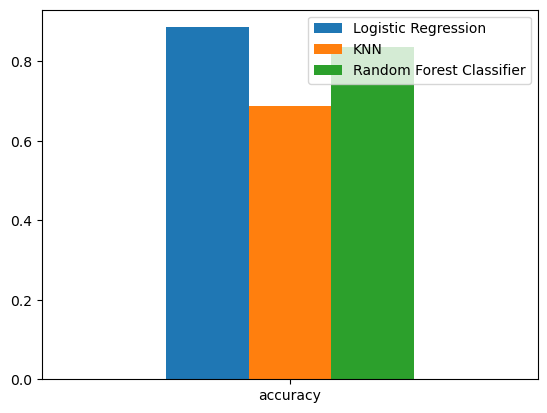

In [30]:
model_compare.plot.bar();
plt.xticks(rotation=0);

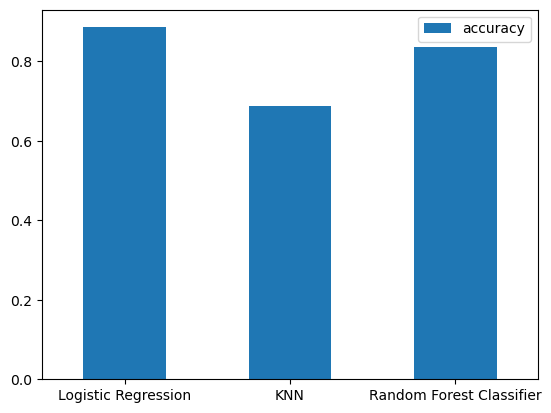

In [31]:
model_compare.T.plot.bar();
plt.xticks(rotation=0);

Now we have got our baseline models which are evaluated based on their default hyperparameters.

Let's briefly go through each before we see them in action.

* **Hyperparameter tuning** - Each model you use has a series of dials you can turn to dictate how they perform. Changing these values may increase or decrease model performance.
* **Feature importance** - If there are a large amount of features we're using to make predictions, do some have more importance than others? For example, for predicting heart disease, which is more important, sex or age?
* **Confusion matrix** - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).
* **Cross-validation** - Splits your dataset into multiple parts and train and tests your model on each part and evaluates performance as an average.
* **Precision** - Proportion of true positives over total number of samples. Higher precision leads to less false positives.
* **Recall** - Proportion of true positives over total number of true positives and false negatives. Higher recall leads to less false negatives.
* **F1 score** - Combines precision and recall into one metric. 1 is best, 0 is worst.
* **Classification report** - Sklearn has a built-in function called `classification_report()` which returns some of the main classification metrics such as precision, recall and f1-score.
* **ROC Curve** - Receiver Operating Characterisitc is a plot of true positive rate versus false positive rate.
* **Area Under Curve (AUC)** - The area underneath the ROC curve. A perfect model achieves a score of 1.0.

### Hyperparameter Tuning (by hand)

#### Let's tune KNN - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [32]:
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbours = range(1,21)
# Check for 20 different values of n_neighbors parameter
# n_neighbors = 5 -> default

# setup KNN instance
knn = KNeighborsClassifier()

# loop through different n_neighbors
for i in neighbours:
    knn.set_params(n_neighbors=i)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Update the train scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))  

In [33]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [34]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data : 75.41%


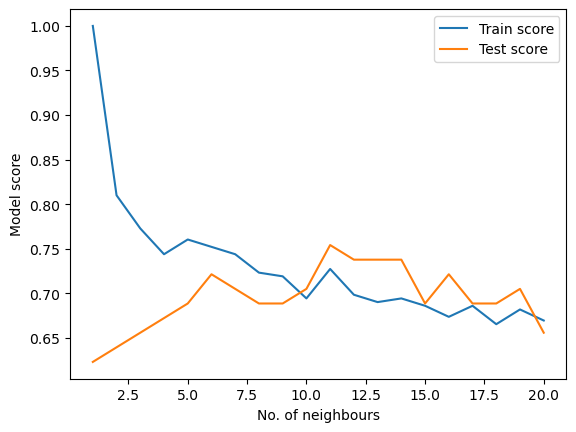

In [35]:
plt.plot(neighbours, train_scores, label="Train score");
plt.plot(neighbours, test_scores, label="Test score");
plt.xlabel("No. of neighbours");
plt.ylabel("Model score");
plt.legend();

print(f"Maximum KNN score on the test data : {max(test_scores)*100:.2f}%")

The maximum score achieved by KNN after tuning is 75.41%, but we want a score around 95%. So, the KNN model is discarded.

### Hyperparameter Tuning with RandomizedSearchCV
We are going to tune :
* Logistic Regression() - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
* Random Forest Classifier() - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [36]:
np.logspace(start=-4, stop=4, num=20)
# np.logspace() - Return numbers spaced evenly on a log scale.

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [37]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {
    "C": np.logspace(start=-4, stop=4, num=20),
    "solver" : ["liblinear"]
}
# C: float, default=1.0 - Inverse of regularization strength; must be a positive float. 
# Like in support vector machines, smaller values specify stronger regularization.
# solver{‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}, default=’lbfgs’
# For small datasets, ‘liblinear’ is a good choice

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {
    "n_estimators" : np.arange(10, 1000, 50),
    "max_depth" : [None, 3, 5, 10],
    "min_samples_split" : np.arange(2, 20, 2),
    "min_samples_leaf" : np.arange(1, 20, 2)
}

In [38]:
log_reg_grid

{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
        4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
        2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
        1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
        5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
 'solver': ['liblinear']}

In [39]:
rf_grid

{'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
        660, 710, 760, 810, 860, 910, 960]),
 'max_depth': [None, 3, 5, 10],
 'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
 'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])}

In [40]:
# Tune LogisticRegression
np.random.seed(42)

# Setup the random hyperparameter search for logistic regression
rs_log_reg = RandomizedSearchCV(estimator=LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
# n_iter = 20 that means 20 different combinations to try

# Fit this model for logistic regression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [41]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [42]:
# Evaluate the randomized search model
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [43]:
# Tune RandomForestClassifier
np.random.seed(42)

# Setup the random hyperparameter search for random forest classifier
rs_rf = RandomizedSearchCV(estimator=RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit this model
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [44]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [45]:
# Evaluate the randomized search model
rs_rf.score(X_test, y_test)

0.8688524590163934

### Hyperparameter Tuning with GridSearchCV

In [46]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {
    "C": np.logspace(start=-4, stop=4, num=30),
    "solver" : ["liblinear"]
}

# Setup grid hyperparameter search for Logistic regression
gs_log_reg = GridSearchCV(estimator=LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit this model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [47]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [50]:
# Evaluate the model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

Performing `GridSearchCV()` on `RandomForestClassifier()` model will take a lot of time as 36000 fits will formed considering each combination. So, we will continue with `LogisticRegression()` model as it is giving better accuracy as comapred to other models.

## Evaluating our tuned ML model, beyond accuracy

* ROC curve and AUC score - RocCurveDisplay()
* Confusion matrix - confusion_matrix()
* Classification report - classification_report()
* Precision - precision_score()
* Recall - recall_score()
* F1-score - f1_score()

In [51]:
# Make predictions with our tuned model
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [52]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [72]:
# Taking the column for class 1
y_probs_positive = gs_log_reg.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

In [74]:
fpr, tpr, thresholds

(array([0.        , 0.        , 0.        , 0.03448276, 0.03448276,
        0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
        0.17241379, 0.31034483, 0.31034483, 0.4137931 , 0.4137931 ,
        1.        ]),
 array([0.     , 0.03125, 0.375  , 0.375  , 0.59375, 0.59375, 0.71875,
        0.71875, 0.90625, 0.90625, 0.9375 , 0.9375 , 0.96875, 0.96875,
        1.     , 1.     ]),
 array([1.9675006 , 0.9675006 , 0.85079082, 0.84234231, 0.7781759 ,
        0.73216374, 0.70538844, 0.69480593, 0.54515819, 0.31714637,
        0.14314492, 0.12640328, 0.11904144, 0.0873472 , 0.0715076 ,
        0.00309601]))

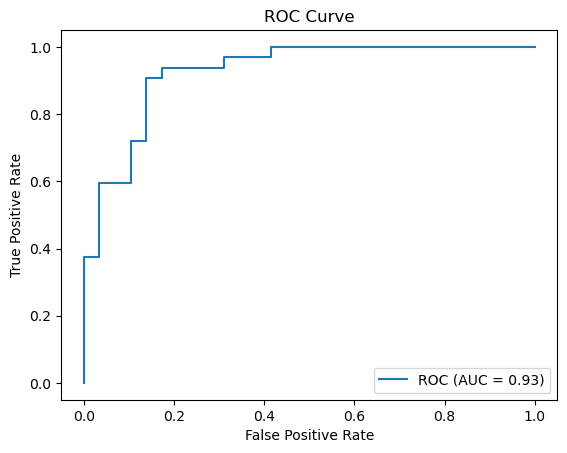

In [86]:
# Plot ROC curve
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, label=f"ROC (AUC = {roc_auc_score(y_test,y_probs_positive):.2f})");
    plt.xlabel("False Positive Rate");
    plt.ylabel("True Positive Rate");
    plt.title("ROC Curve");
    plt.legend();
    plt.show();
    
plot_roc_curve(fpr, tpr)

In [92]:
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
roc_auc_score(y_test, y_probs_positive)

0.925646551724138

In [103]:
# Confusion matrix
confusion_matrix(y_test, y_preds)

array([[25,  4],
       [ 3, 29]], dtype=int64)

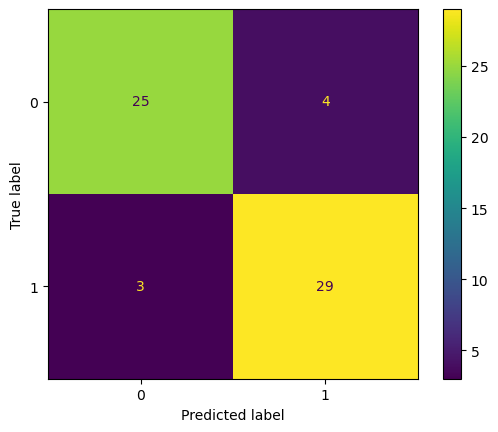

In [104]:
ConfusionMatrixDisplay.from_estimator(estimator=gs_log_reg, X=X_test, y=y_test);

In [107]:
# Classification Report
print(classification_report(y_test, y_preds))
# This gives the classification report on only 1 test set

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



#### Calculate the cross-validated accuracy, precision, recall and f1-score.

In [110]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [111]:
# Create a new classifier with best hyperparameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [117]:
# Cross-validated accuracy
cv_acc= cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [125]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [120]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                               X,
                               y,
                               cv=5,
                               scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [121]:
# Cross-validated recall
cv_recall = np.mean(cross_val_score(clf,
                                    X, 
                                    y,
                                    cv=5,
                                    scoring="recall"))
cv_recall

0.9212121212121213

In [122]:
# Cross-validated f1-score
cv_f1 = np.mean(cross_val_score(clf,
                                X, 
                                y,
                                cv=5,
                                scoring="f1"))
cv_f1

0.8673007976269721

In [135]:
# Visualize the cross-validated metrics
cv_metrics = pd.DataFrame({
    "Accuracy" : cv_acc,
    "Precision" : cv_precision,
    "Recall" : cv_recall,
    "F1" : cv_f1,
}, index=["Cross-validated score"])

cv_metrics

,Accuracy,Precision,Recall,F1
Cross-validated score,0.844699,0.820794,0.921212,0.867301


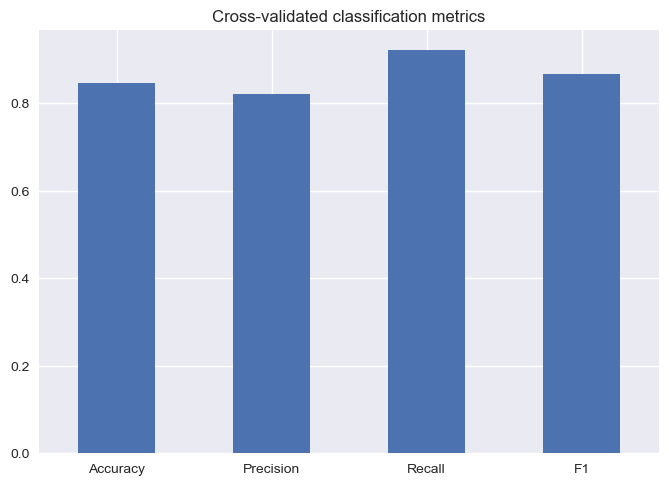

In [145]:
plt.style.use("seaborn-v0_8")
cv_metrics.T.plot.bar(title="Cross-validated classification metrics", legend=False);
plt.xticks(rotation=0);

### Feature Importance
Feature importance is another way of asking, "which features contributing most to the outcomes of the model?"

Unlike some of the other functions we've seen, because how each model finds patterns in data is slightly different, how a model judges how important those patterns are is different as well. This means for each model, there's a slightly different way of finding which features were most important.

In [148]:
clf

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [149]:
# Fit an instance of LogisticRegression
clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

#### The `coef_` attribute is the coefficient of the features in the decision function. We can access the `coef_` attribute after we've fit an instance of LogisticRegression. It tells that how much each variable has contributed to predict target labels.

In [157]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.86044652,  0.6606704 , -0.01156993, -0.00166375,
         0.04386107,  0.31275848,  0.02459362, -0.60413081, -0.56862803,
         0.45051628, -0.63609898, -0.67663373]])

In [161]:
# Match the coefficient of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672806268220445,
 'sex': -0.8604465226286001,
 'cp': 0.6606703996492814,
 'trestbps': -0.011569930743501303,
 'chol': -0.001663745833540806,
 'fbs': 0.043861067871676124,
 'restecg': 0.3127584791782968,
 'thalach': 0.02459361509185037,
 'exang': -0.6041308102637141,
 'oldpeak': -0.5686280255489925,
 'slope': 0.4505162810238786,
 'ca': -0.6360989756865822,
 'thal': -0.67663372723561}

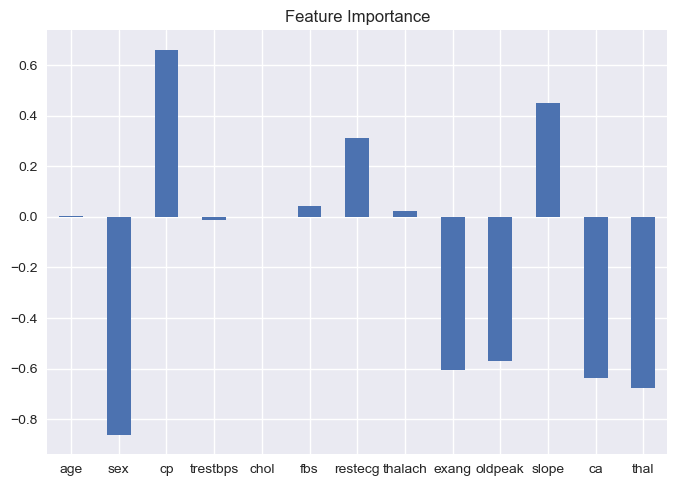

In [173]:
# Visualize the feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);
plt.xticks(rotation=0);

The larger the value (bigger bar), the more the feature contributes to the models decision.

If the value is negative, it means there's a negative correlation. And vice versa for positive values.

For example, the `sex` attribute has a negative value of -0.904, which means as the value for `sex` increases, the `target` value decreases.

In [175]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [176]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


This positive correlation means our model is picking up the pattern that as `slope` increases, so does the `target` value.

### Out of the 3 models namely - LogisticRegression(), KNeighborsClassifier() and RandomForestClassifier(), the LogisticRegression() model has performed better than the other models with the accuracy of 88.52%.